<a href="https://colab.research.google.com/github/AditiyaS/DataAnalysisLearning/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Aditiya Saputra]
- **Email:** [Aditiya]
- **ID Dicoding:** [aditiya18]

## Menentukan Pertanyaan Bisnis

- 1. Musim apa yang memiliki jumlah penggunaan sepeda tertinggi?
- 2. Bagaimana penyewaan sepeda dipengaruhi oleh suhu? Apakah pengguna lebih sering menyewa sepeda saat suhu hangat atau dingin?
- 3. Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur?
- 4. Bagaimana pola penggunaan sepeda pada setiap jam di hari kerja dibandingkan dengan hari libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df=pd.read_csv('/content/day.csv')
day_df.head(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df=pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Merge Dataset

In [ ]:
day_df=pd.read_csv('/content/day.csv')
hour_df=pd.read_csv('/content/hour.csv')

main_data = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    on="instant"
)

print(main_data)


main_data.to_csv("main_data.csv", index=False)

     instant    dteday_x  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1          0          6   
1          2  2011-01-02         1     0       1          0          0   
2          3  2011-01-03         1     0       1          0          1   
3          4  2011-01-04         1     0       1          0          2   
4          5  2011-01-05         1     0       1          0          3   
..       ...         ...       ...   ...     ...        ...        ...   
726      727  2012-12-27         1     1      12          0          4   
727      728  2012-12-28         1     1      12          0          5   
728      729  2012-12-29         1     1      12          0          6   
729      730  2012-12-30         1     1      12          0          0   
730      731  2012-12-31         1     1      12          0          1   

     workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0               0             2  0.3

### Assessing Data

Melihat informasi setiap kolom dataset

In [ ]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   dteday_x      731 non-null    object 
 2   season_x      731 non-null    int64  
 3   yr_x          731 non-null    int64  
 4   mnth_x        731 non-null    int64  
 5   holiday_x     731 non-null    int64  
 6   weekday_x     731 non-null    int64  
 7   workingday_x  731 non-null    int64  
 8   weathersit_x  731 non-null    int64  
 9   temp_x        731 non-null    float64
 10  atemp_x       731 non-null    float64
 11  hum_x         731 non-null    float64
 12  windspeed_x   731 non-null    float64
 13  casual_x      731 non-null    int64  
 14  registered_x  731 non-null    int64  
 15  cnt_x         731 non-null    int64  
 16  dteday_y      731 non-null    object 
 17  season_y      731 non-null    int64  
 18  yr_y          731 non-null    

Setelah di merge atribute column yang berakhiran _x(ini merupakan dataset day), sedangkan atribute column yang berakhiran _y(ini merupuakan dataset hour).

Mengetahui jumlah missing value di setiap Kolom day_df

In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Memeriksa missing value hour csv

In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Memeriksa data Duplicated

In [ ]:
data_duplicated_hour = hour_df.duplicated().sum()
data_duplicated_day = day_df.duplicated().sum()

print("Jumlah data Duplikat dari Data Day CSV sebanyak : ", data_duplicated_day)
print("Jumlah data Duplikat dari Data Hour CSV sebanyak : ", data_duplicated_hour)

Jumlah data Duplikat dari Data Day CSV sebanyak :  0
Jumlah data Duplikat dari Data Hour CSV sebanyak :  0


Melihat kesimpulan data statistik deskriptif Day

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat kesimpulan data statistik deskriptif Hour

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Convert tipe data "dateday" menjadi datetime

In [ ]:
# Mengubah kolom 'dteday' pada day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengubah kolom 'dteday' pada hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menampilkan informasi tipe data setelah perubahan
print("Tipe data pada day_df setelah perubahan:")
print(day_df.info())

print("\nTipe data pada hour_df setelah perubahan:")
print(hour_df.info())

Tipe data pada day_df setelah perubahan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64

Mengubah value kolom "season" , agar data lebih informatif/deskriptif

In [ ]:
# Mengubah angka season menjadi nama musim yang lebih mudah dimengerti
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring


Mengubah nilai dari "temp, atemp, hum and windspeed" ke bentuk yang telah dinormalisasi sebelumnya. sehingga lebih mudah  dianalisis.

In [ ]:
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

# Menampilkan 5 baris pertama untuk memeriksa perubahan
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Spring


Simpan dataset yang sudah clean

In [ ]:
day_df.to_csv("clean_day_bike_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore  ringkasan statistik data

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,NaN


Jumlah Penggunaan Sepeda tiap musim


In [ ]:
# Mapping season to readable names
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)

# Average rentals per season
season_avg_df = day_df.groupby('season_name')['cnt'].sum().reset_index()
season_avg_df.columns = ['Musim', 'Total Penggunaan Sepeda']
season_avg_df


,Musim,Total Penggunaan Sepeda
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


Fall Menjadi Jumlah Terbanyak, Sedangkan Winter Jumlah Terdikit untuk total Penyewaan Sepeda

---



Jumlah  penyewaan Sepeda Pada Kategori Suhu Tertentu

In [ ]:
# Categorizing temperature into 5 bins
day_df['temp_bin'], bins = pd.cut(day_df['temp'], bins=5, labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'], retbins=True)

# Average rentals per temperature category
temp_avg_df = day_df.groupby('temp_bin')['cnt'].sum().reset_index()
temp_avg_df.columns = ['Kategori Suhu', 'Total Penyewaan Sepeda']
temp_avg_df


<ipython-input-17-bb991d88d1d0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg_df = day_df.groupby('temp_bin')['cnt'].sum().reset_index()


,Kategori Suhu,Total Penyewaan Sepeda
0,Sangat Dingin,67560
1,Dingin,611491
2,Sedang,793343
3,Hangat,1100942
4,Panas,719343


Pada Suhu Hangat Total Penyewaan Sepeda Paling Tinggi, sedangkan pada suhu sangat dingin total penyewaan sangat rendah

---



**Jumlah Total Penyewaan Sepeda Setiap Jam pada Hari Kerja VS Hari Libur**

In [ ]:
# Data split by working day and holiday
working_day_df = hour_df[hour_df['workingday'] == 1]
holiday_df = hour_df[hour_df['workingday'] == 0]

# Average rentals per hour for working day and holiday
working_day_hourly_avg_df = working_day_df.groupby('hr')['cnt'].sum().reset_index()
holiday_hourly_avg_df = holiday_df.groupby('hr')['cnt'].sum().reset_index()

# Rename columns for clarity
working_day_hourly_avg_df.columns = ['Jam', 'Total Penyewaan (Hari Kerja)']
holiday_hourly_avg_df.columns = ['Jam', 'Total Penyewaan (Hari Libur)']

# Merge the two dataframes for comparison
hourly_comparison_df = pd.merge(working_day_hourly_avg_df, holiday_hourly_avg_df, on='Jam')
hourly_comparison_df


,Jam,Total Penyewaan (Hari Kerja),Total Penyewaan (Hari Libur)
0,0,18246,20884
1,1,8177,15987
2,2,4229,12123
3,3,2323,5851
4,4,2552,1876
5,5,12332,1929
6,6,50840,4292
7,7,144144,10027
8,8,236595,24406
9,9,119793,39645


Dari dataframe diatas, dapat sedikit disimpulkan pada pagi dan sore hari cukup banyak dalam penyewaan sepeda

---



## Visualization & Explanatory Analysis

### Pertanyaan 1:

# **1.  Musim apa yang memiliki rata-rata penggunaan sepeda tertinggi?**

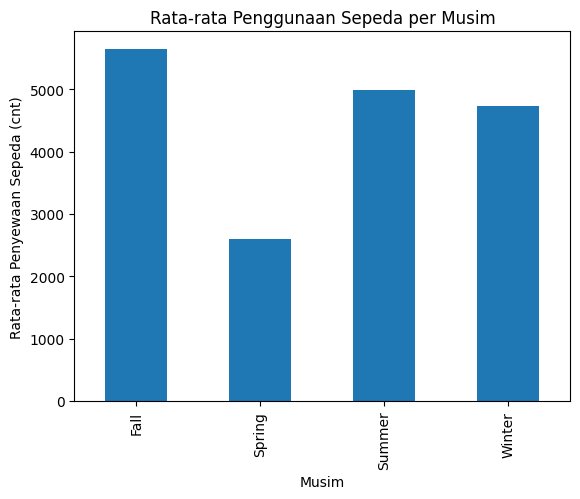

In [ ]:
# Menghitung rata-rata penyewaan sepeda per musim
season_avg = day_df.groupby('season_name')['cnt'].mean()

# Visualisasi
import matplotlib.pyplot as plt
season_avg.plot(kind='bar', title='Rata-rata Penggunaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda (cnt)')
plt.show()


Insight
*   Rata-rata penggunaan sepeda menunjukkan bahwa musim Fall (musim gugur) memiliki tingkat penyewaan tertinggi dengan 5644 penyewaan, diikuti oleh musim Summer (musim panas) dengan 4992 penyewaan. Sementara itu, musim Winter (musim dingin) dan Spring (musim semi) mencatatkan angka yang lebih rendah, masing-masing dengan 4728 dan 2604 penyewaan.



### Pertanyaan 2:

Bagaimana penyewaan sepeda dipengaruhi oleh suhu? Apakah pengguna lebih sering menyewa sepeda saat suhu hangat atau dingin?

<ipython-input-20-01389f0260c9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = day_df.groupby('temp_bin')['cnt'].mean()


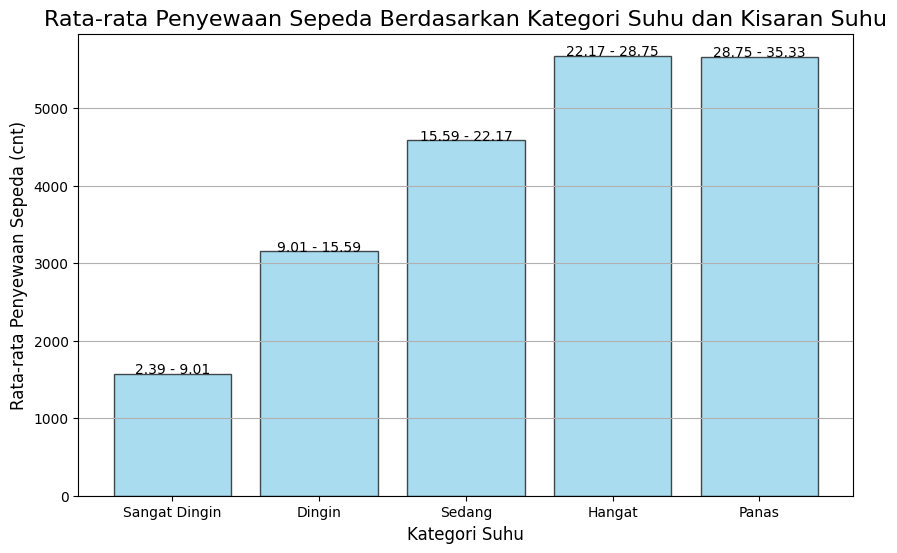

In [ ]:
# Membagi kolom suhu (temp) ke dalam 5 kategori menggunakan pd.cut
day_df['temp_bin'], bins = pd.cut(day_df['temp'],
                                   bins=5,
                                   labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'],
                                   retbins=True)

# Menghitung rata-rata penyewaan sepeda per kategori suhu
temp_avg = day_df.groupby('temp_bin')['cnt'].mean()

# Siapkan data untuk visualisasi
categories = day_df['temp_bin'].cat.categories
temp_ranges = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)]
average_counts = temp_avg.values

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Bar chart untuk rata-rata penyewaan sepeda
bars = plt.bar(categories, average_counts, color='skyblue', alpha=0.7, edgecolor='black')

# Menambahkan garis horizontal untuk menunjukkan kisaran suhu
for i, bar in enumerate(bars):
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y + 1, temp_ranges[i], ha='center', color='black')

# Mengatur label dan judul
plt.xlabel('Kategori Suhu', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda (cnt)', fontsize=12)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu dan Kisaran Suhu', fontsize=16)

# Menampilkan grid
plt.grid(axis='y')

# Menampilkan grafik
plt.show()

Insight

*   Dari grafik, dapat dilihat bahwa kategori suhu "Hangat" dan "Panas" memiliki jumlah penyewaan sepeda yang tertinggi, dengan rata-rata di atas 4.000 penyewaan. Sementara itu, kategori "Sangat Dingin" memiliki rata-rata penyewaan terendah, dengan jumlah yang signifikan lebih kecil dibandingkan dengan kategori suhu lainnya.



## Analisis Lanjutan (Opsional)

 3. Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur?

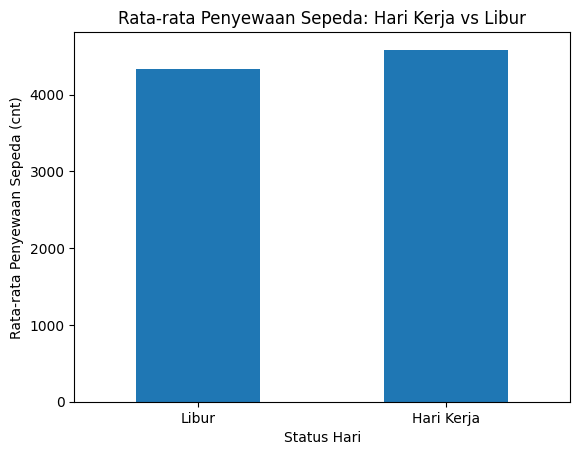

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan status hari kerja dan libur
average_rentals = day_df.groupby('workingday')['cnt'].mean()

# Visualisasi
average_rentals.plot(kind='bar', title='Rata-rata Penyewaan Sepeda: Hari Kerja vs Libur')
plt.xticks(ticks=[0, 1], labels=['Libur', 'Hari Kerja'], rotation=0)
plt.xlabel('Status Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda (cnt)')
plt.show()

Insight

*   analisis rata-rata penyewaan sepeda berdasarkan status hari menunjukkan bahwa terdapat sedikit perbedaan dalam jumlah penyewaan antara hari kerja dan hari libur. Rata-rata penyewaan sepeda pada hari libur (4,330.17) lebih rendah dibandingkan dengan hari kerja (4,584.82).

---





4. Bagaimana pola penggunaan sepeda pada setiap jam di hari kerja dibandingkan dengan hari libur?


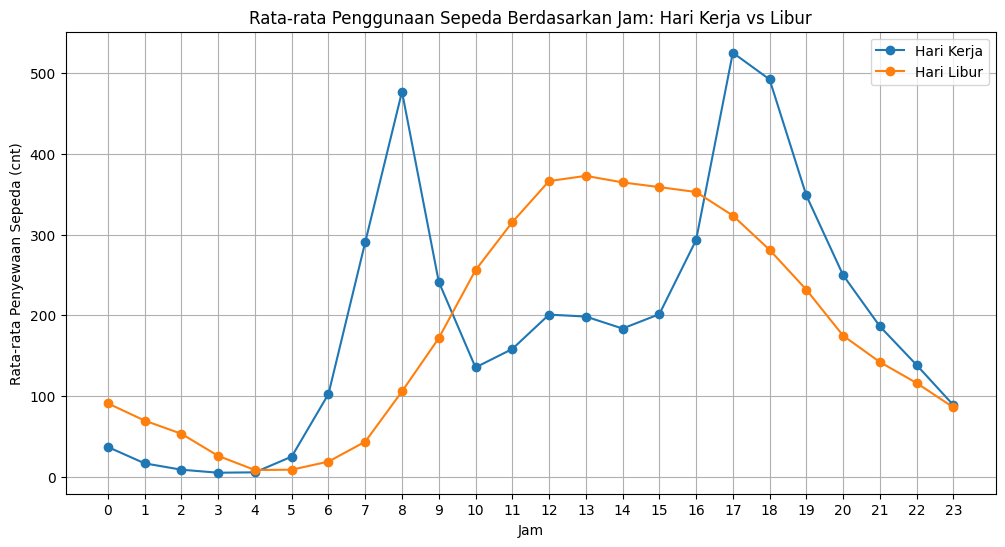

In [ ]:
# Memisahkan data berdasarkan status hari kerja dan libur
working_day_df = hour_df[hour_df['workingday'] == 1]
holiday_df = hour_df[hour_df['workingday'] == 0]

# Menghitung rata-rata penyewaan sepeda per jam
working_day_hourly_avg = working_day_df.groupby('hr')['cnt'].mean()
holiday_hourly_avg = holiday_df.groupby('hr')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(working_day_hourly_avg.index, working_day_hourly_avg, label='Hari Kerja', marker='o')
plt.plot(holiday_hourly_avg.index, holiday_hourly_avg, label='Hari Libur', marker='o')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Jam: Hari Kerja vs Libur')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda (cnt)')
plt.xticks(range(0, 24))  # Menampilkan setiap jam dari 0 hingga 23
plt.legend()
plt.grid()
plt.show()


Insight

*   Berdasarkan grafik yang menunjukkan rata-rata penggunaan sepeda antara hari kerja dan hari libur, terdapat perbedaan pola penyewaan yang jelas. Pada hari kerja, penggunaan sepeda menunjukkan puncaknya pada jam-jam awal pagi dan sore, yaitu saat orang berangkat dan pulang kerja, dengan angka tertinggi mencapai sekitar 500 penyewaan. Sebaliknya, penggunaan sepeda di hari libur cenderung lebih merata sepanjang hari, meskipun tetap menunjukkan puncak kecil di sore hari. Angka penyewaan di hari libur umumnya lebih rendah dibandingkan dengan hari kerja, yang mengindikasikan bahwa faktor kerja memiliki pengaruh signifikan terhadap pola penyewaan sepeda.



## Conclusion

1. Musim apa yang memiliki jumlah penggunaan sepeda tertinggi?
*   Tujuan: Menganalisis pengaruh musim terhadap penggunaan sepeda untuk membantu perumusan strategi jangka panjang.
*   Kesimpulan: Musim Fall (gugur) mencatat penggunaan tertinggi, diikuti oleh Summer (panas). Musim dingin dan semi memiliki penyewaan lebih rendah.


---



2. Bagaimana penyewaan sepeda dipengaruhi oleh suhu? Apakah pengguna lebih sering menyewa sepeda saat suhu hangat atau dingin?



*   Tujuan: Memahami apakah pengguna lebih cenderung menyewa sepeda saat suhu hangat atau dingin untuk membantu dalam perencanaan strategi pemasaran dan pengelolaan armada.
*   Kesimpulan: Penyewaan tertinggi terjadi pada suhu hangat dan panas, sementara penyewaan sangat rendah saat suhu sangat dingin.

---



3. Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur?



*   Tujuan: Mengidentifikasi perbedaan pola penggunaan sepeda pada hari kerja dan hari libur untuk membantu dalam perencanaan layanan dan promosi.
*   Kesimpulan: Hari kerja memiliki penyewaan lebih tinggi dibandingkan hari libur, menunjukkan sepeda lebih banyak digunakan sebagai transportasi sehari-hari



---


4. Bagaimana pola penggunaan sepeda pada setiap jam di hari kerja dibandingkan dengan hari libur?


*   Tujuan: Memahami pola penggunaan sepeda per jam untuk mengoptimalkan ketersediaan sepeda dan strategi pemasaran.
*   Kesimpulan: Pada hari kerja, puncak penggunaan terjadi di pagi dan sore hari. Pada hari libur, penggunaan lebih merata sepanjang hari, tetapi tetap lebih rendah dibandingkan hari kerja.

